In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Date': pd.date_range(start='2024-06-01', periods=90, freq='D'),
    'Account_Balance': np.random.normal(1000, 200, 90),
    'Purchase_Amount': np.random.uniform(50, 300, 90),
    'Customer_Rating': np.random.randint(1, 6, 90),
    'Membership_Type': np.random.choice(['Basic', 'Gold', 'Platinum'], 90),
    'Is_Active': np.random.choice([True, False], 90, p=[0.75, 0.25]),
    'Location': np.random.choice(['CityA', 'CityB', 'CityC'], 90)
}

In [3]:
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df.head()

,Account_Balance,Purchase_Amount,Customer_Rating,Membership_Type,Is_Active,Location
Date,,,,,,
2024-06-01,934.593974,284.605335,3,Basic,False,CityA
2024-06-02,1101.240918,180.094840,4,Gold,False,CityC
2024-06-03,1256.416037,249.533803,4,Platinum,True,CityC
2024-06-04,860.249398,173.534102,3,Platinum,False,CityC
2024-06-05,1054.917819,109.523224,1,Gold,True,CityB


Lesson 1: Filtering and New Column Creation
Task: Filter the DataFrame to keep only rows where Stock_Price is above 100 and Active_Status is True. Add a new column Price_Category that labels Stock_Price as 'Low' (< 95), 'Medium' (95-110), or 'High' (> 110) using np.select(). Display the first 10 rows.
Hints: Use boolean indexing and np.select() with conditions.

In [7]:
filtered_df = df[(df['Account_Balance'] > 1000) & (df['Is_Active'] == True)]
conditions = [
    df['Account_Balance'] < 900,
    (df['Account_Balance'] >= 900) & (df['Account_Balance'] < 1100)
]
choices = ['Low', 'Medium']

df['Balance_Level'] = np.select(conditions, choices, default='High')
df.head(2)

,Account_Balance,Purchase_Amount,Customer_Rating,Membership_Type,Is_Active,Location,Balance_Level
Date,,,,,,,
2024-06-01,934.593974,284.605335,3,Basic,False,CityA,Medium
2024-06-02,1101.240918,180.094840,4,Gold,False,CityC,High


Lesson 2: Grouping with Aggregation
Task: Group the DataFrame by Membership_Type and calculate the average Purchase_Amount and the maximum Customer_Rating. Sort the result by average Purchase_Amount in descending order.
Hints: Use groupby() and agg() with a dictionary of functions.

In [8]:
grouped_df = df.groupby('Membership_Type').agg({
    'Purchase_Amount': 'mean', 
     'Customer_Rating': 'max'
})
grouped_df.sort_values('Purchase_Amount')

,Purchase_Amount,Customer_Rating
Membership_Type,,
Gold,167.339594,5
Platinum,168.429845,5
Basic,181.332676,5


Lesson 3: Custom Categorization with np.select()
Task: Create a column Rating_Category that categorizes Customer_Rating as 'Poor' (1-2), 'Average' (3-4), or 'Excellent' (5) using np.select(). Display the value counts.
Hints: Define conditions based on rating ranges and use a default..

In [20]:
conditions = [
   ( df['Customer_Rating'] == 1) | (df['Customer_Rating'] == 2),
   ( df['Customer_Rating'] == 3) | ( df['Customer_Rating'] == 4) 
]

choices = ['Poor', 'Average']

df['Rating_Category'] = np.select(conditions, choices, default='Excellent')
df.head(2)

,Account_Balance,Purchase_Amount,Customer_Rating,Membership_Type,Is_Active,Location,Balance_Level,Rating_Category
Date,,,,,,,,
2024-06-01,934.593974,284.605335,3,Basic,False,CityA,Medium,Average
2024-06-02,1101.240918,180.094840,4,Gold,False,CityC,High,Average


Lesson 4: Line Plot with Trend
Task: Plot Account_Balance over time as a line graph. Add a 5-day rolling average line. Label the axes and add a title.
Hints: Use rolling(5).mean() and plt.plot() with labels.

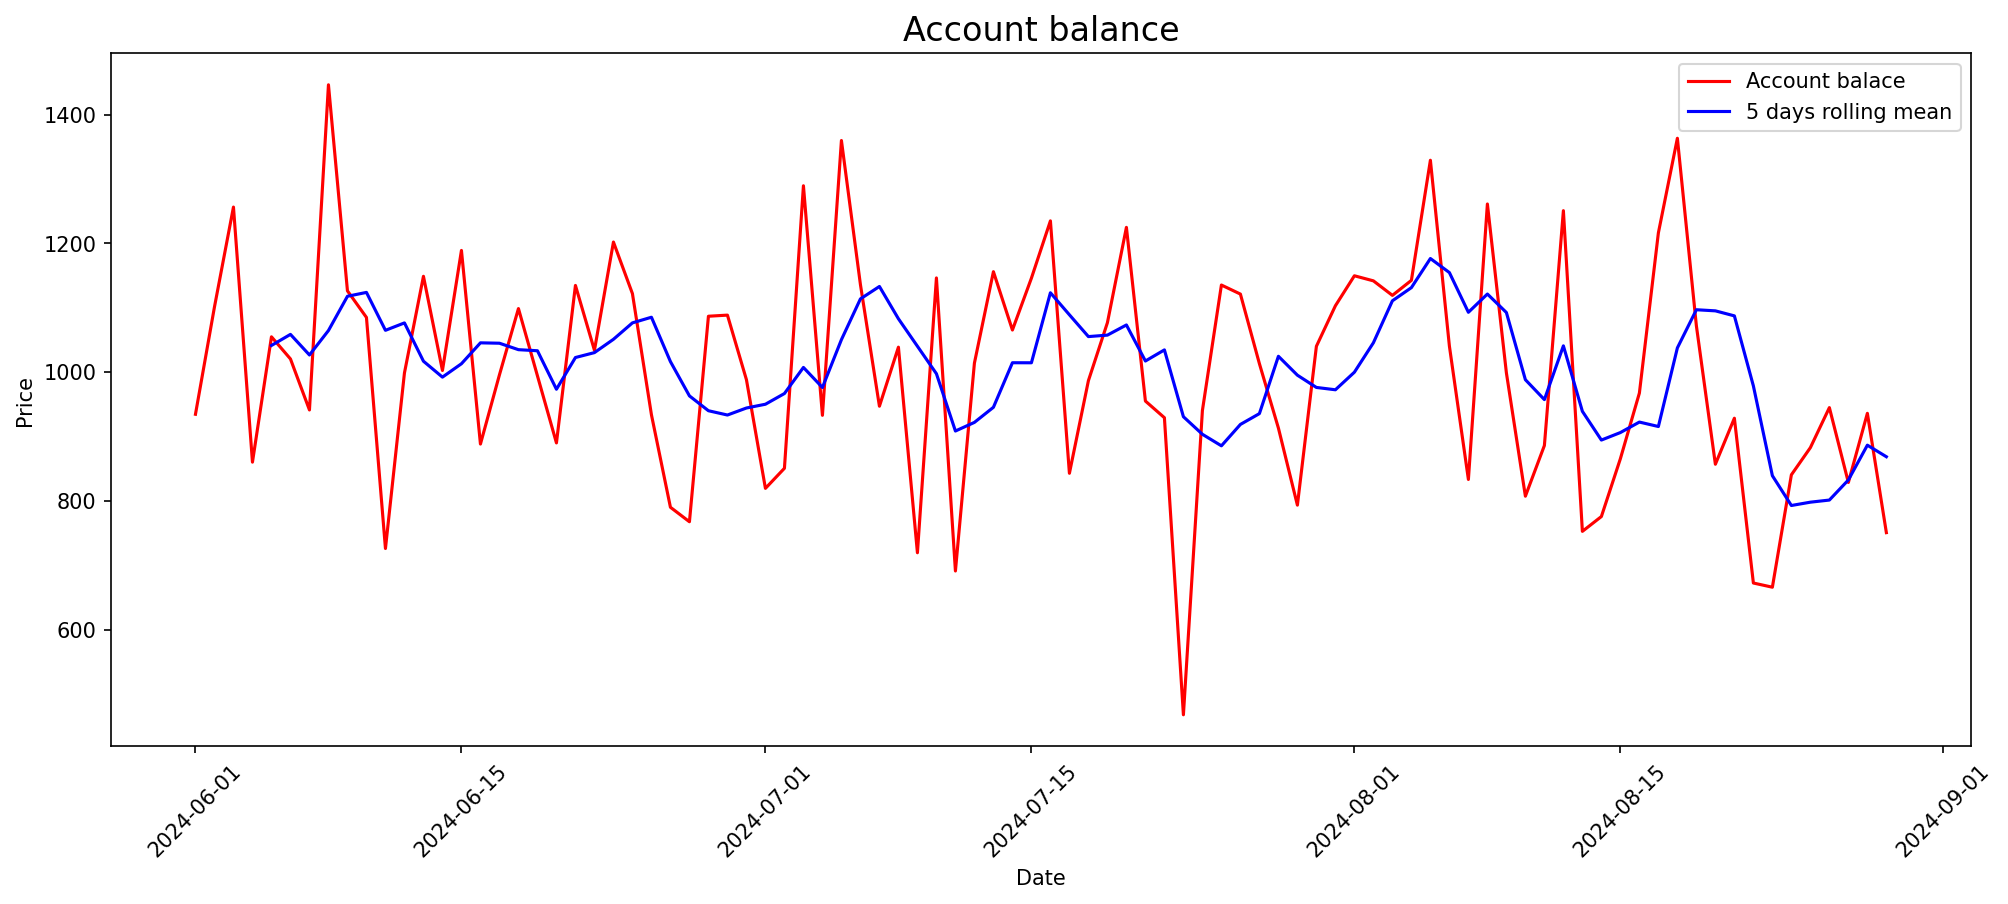

In [31]:
plt.figure(figsize=(16, 6), dpi=150)
plt.plot(df.index, df['Account_Balance'], label='Account balace', color='red')
plt.plot(df.index, df['Account_Balance'].rolling(5).mean(), label='5 days rolling mean', color='blue')
plt.legend()
plt.title('Account balance', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.show()

Lesson 5: Bar Plot by Location
Task: Create a bar plot showing the average Purchase_Amount for each Location. Rotate x-axis labels by 45 degrees and add a title.
Hints: Use sns.barplot() and customize with plt.title() and plt.xticks().

<Figure size 2250x900 with 0 Axes>

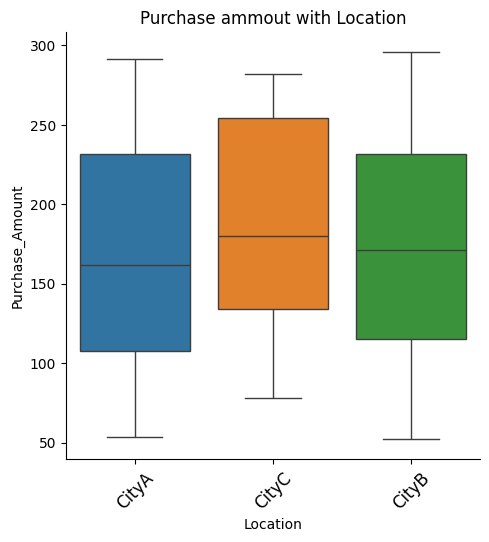

In [57]:
plt.figure(figsize=(15, 6), dpi=150)
sns.catplot(x='Location', y='Purchase_Amount', data=df, hue='Location', kind='box')
plt.xticks(rotation=45, fontsize=12)
plt.title('Purchase ammout with Location')

plt.show()

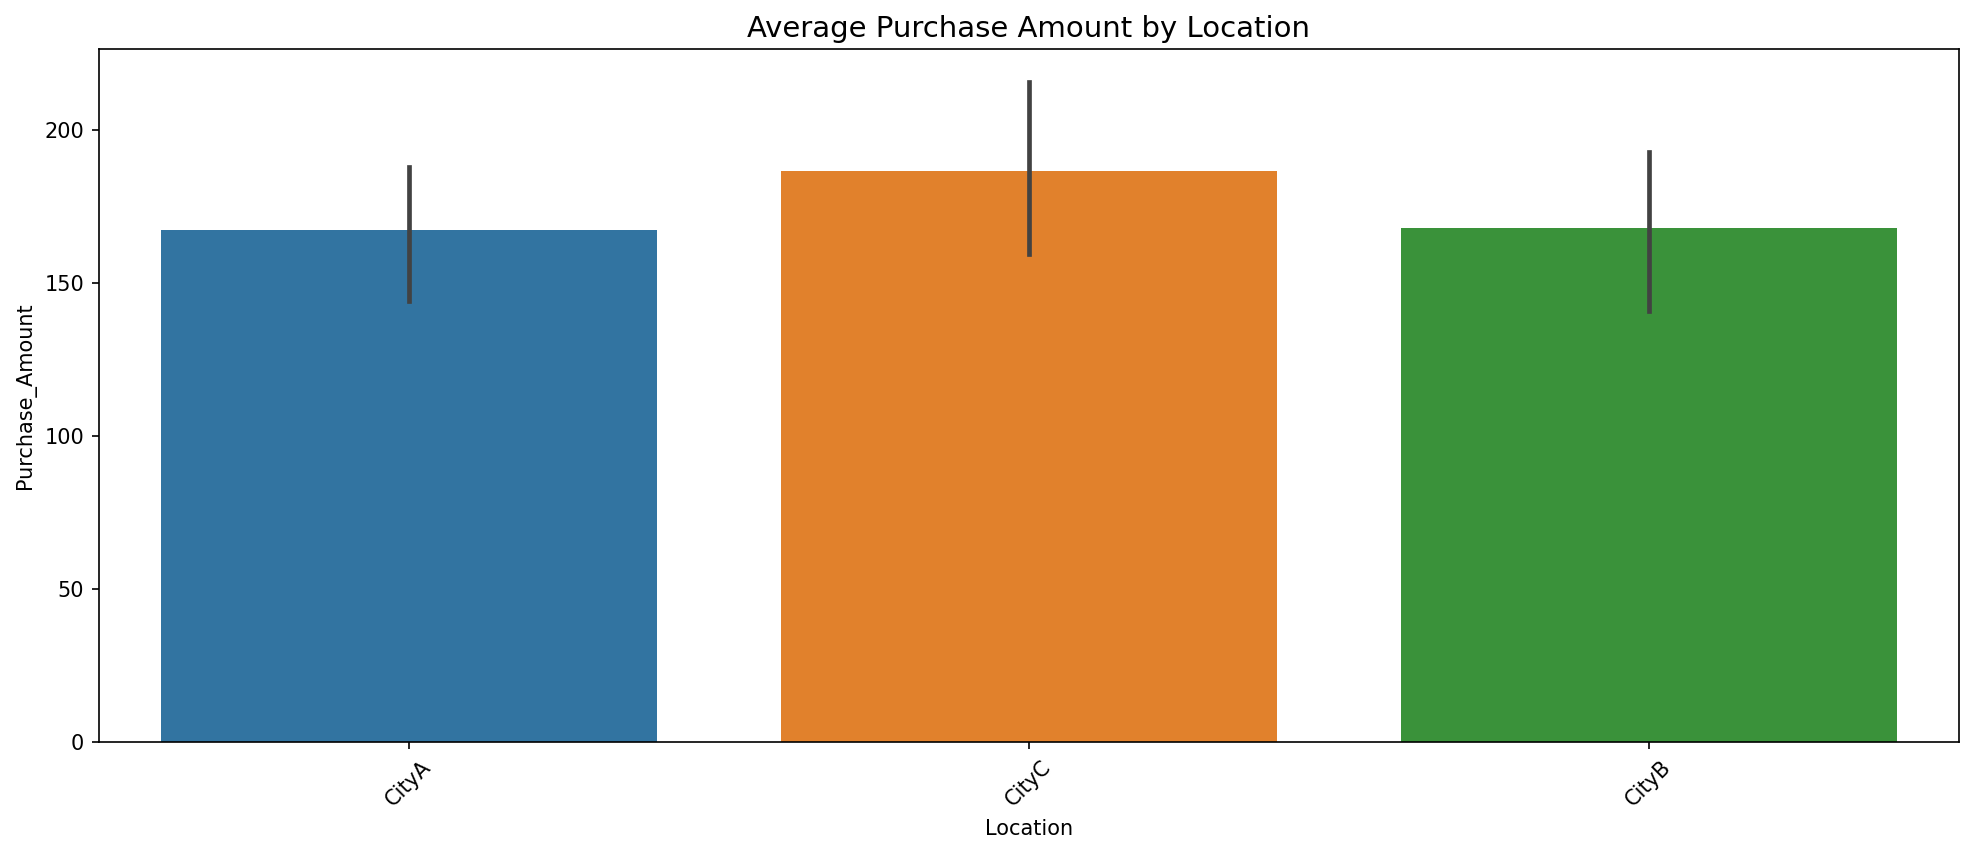

In [48]:
plt.figure(figsize=(16, 6), dpi=150)
sns.barplot(data=df, x='Location', y='Purchase_Amount', hue='Location')
plt.xticks(rotation=45)
plt.title('Average Purchase Amount by Location', fontsize=14)
plt.show()

Lesson 6: Scatter Plot with Color
Task: Create a scatter plot of Purchase_Amount vs. Account_Balance, using Is_Active to color the points. Add a title.
Hints: Use sns.scatterplot() with hue=.

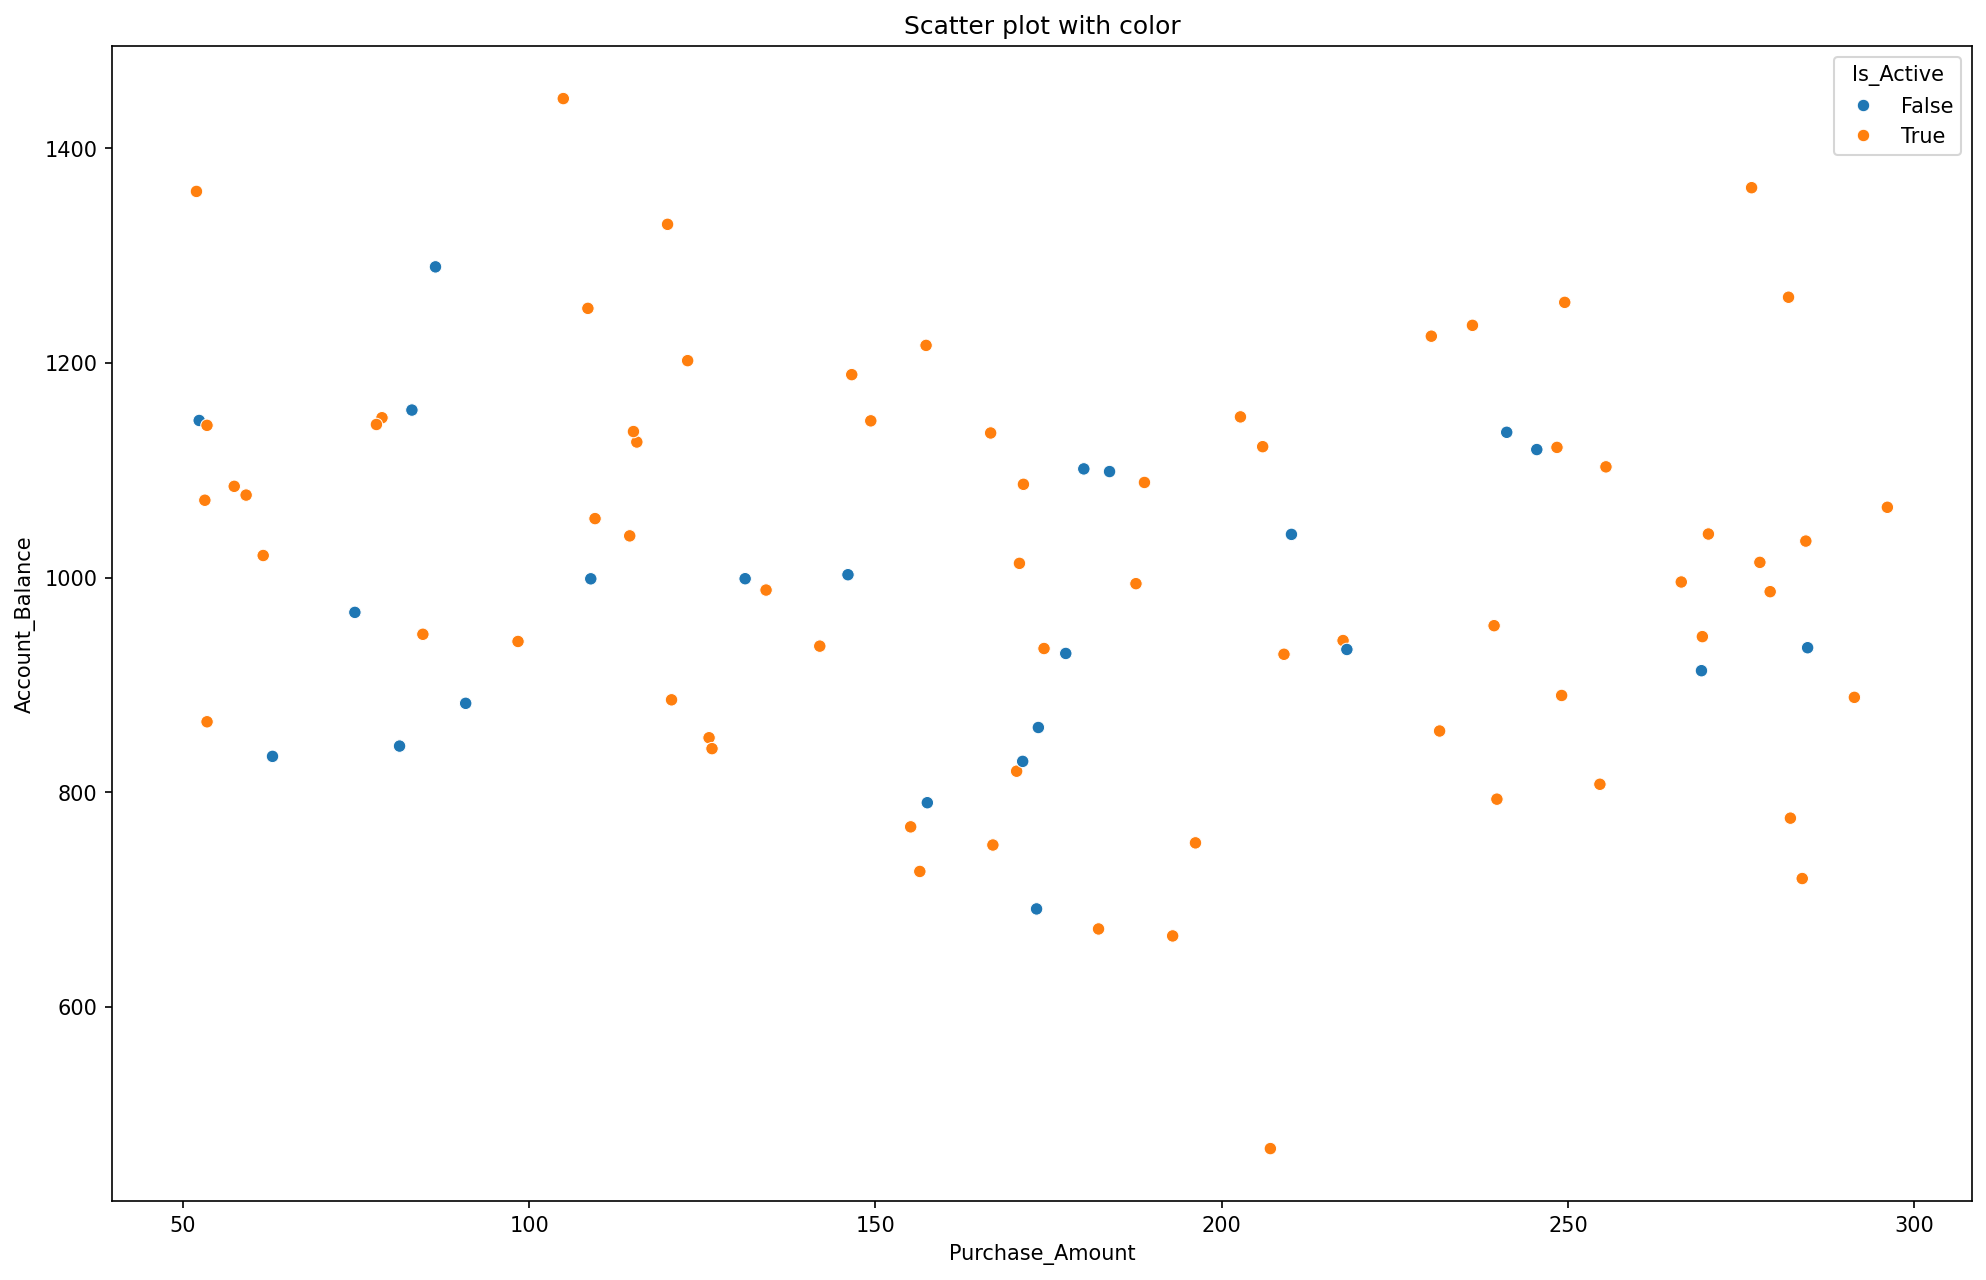

In [53]:
plt.figure(figsize=(16, 10), dpi=150)
sns.scatterplot(x=df['Purchase_Amount'], y=df['Account_Balance'], data=df, hue='Is_Active', markers=True)
plt.title('Scatter plot with color')

plt.show()

Lesson 7: Box Plot by Membership
Task: Create a box plot of Customer_Rating for each Membership_Type. Add a title.
Hints: Use sns.boxplot() and adjust labels.

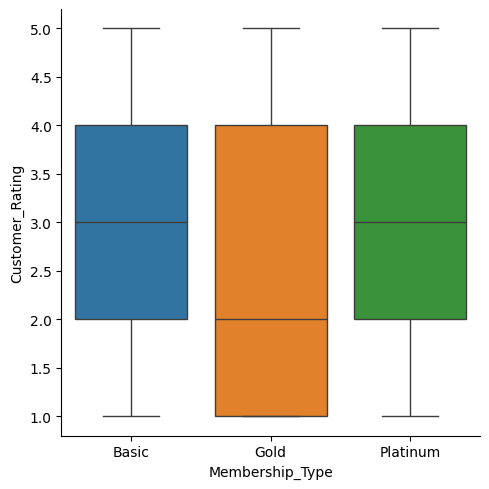

In [60]:
sns.catplot(data=df, x='Membership_Type', y='Customer_Rating', hue='Membership_Type', kind='box')

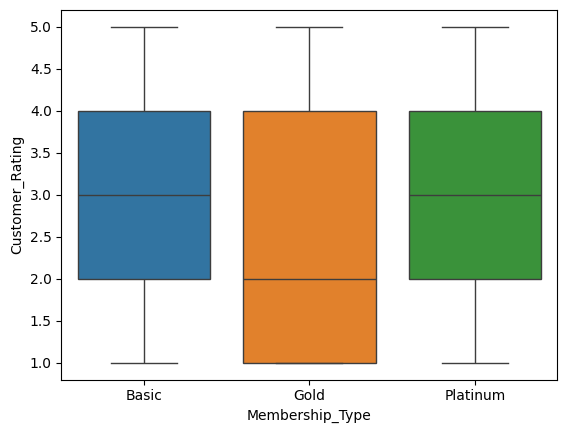

In [61]:
sns.boxplot(data=df, x='Membership_Type', y='Customer_Rating', hue='Membership_Type')
plt.show()

Lesson 8: Correlation Heatmap
Task: Create a correlation heatmap for Account_Balance, Purchase_Amount, and Customer_Rating. Add a title.
Hints: Use df.corr() and sns.heatmap() with annot=True.

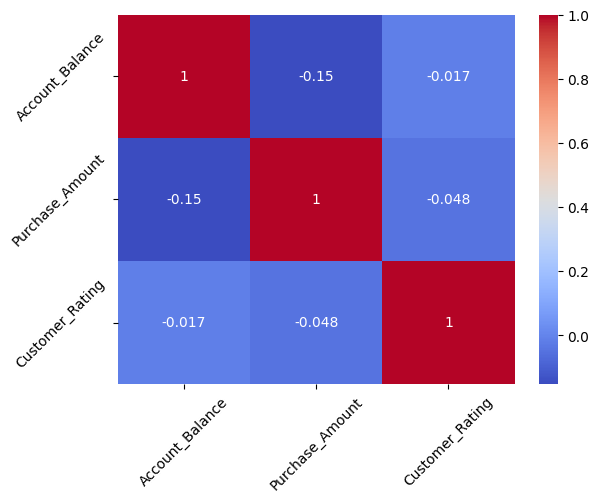

In [71]:
sns.heatmap(
    data=df[['Account_Balance', 'Purchase_Amount', 'Customer_Rating']].corr(), 
    annot=True, 
    cmap='coolwarm'
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

Lesson 9: Stacked Bar Plot
Task: Create a stacked bar plot showing the count of Is_Active (True/False) for each Location. Add a legend.
Hints: Use sns.histplot() with multiple='stack'.

C:\Users\eto\AppData\Local\Temp\ipykernel_10684\598900574.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Is Active')


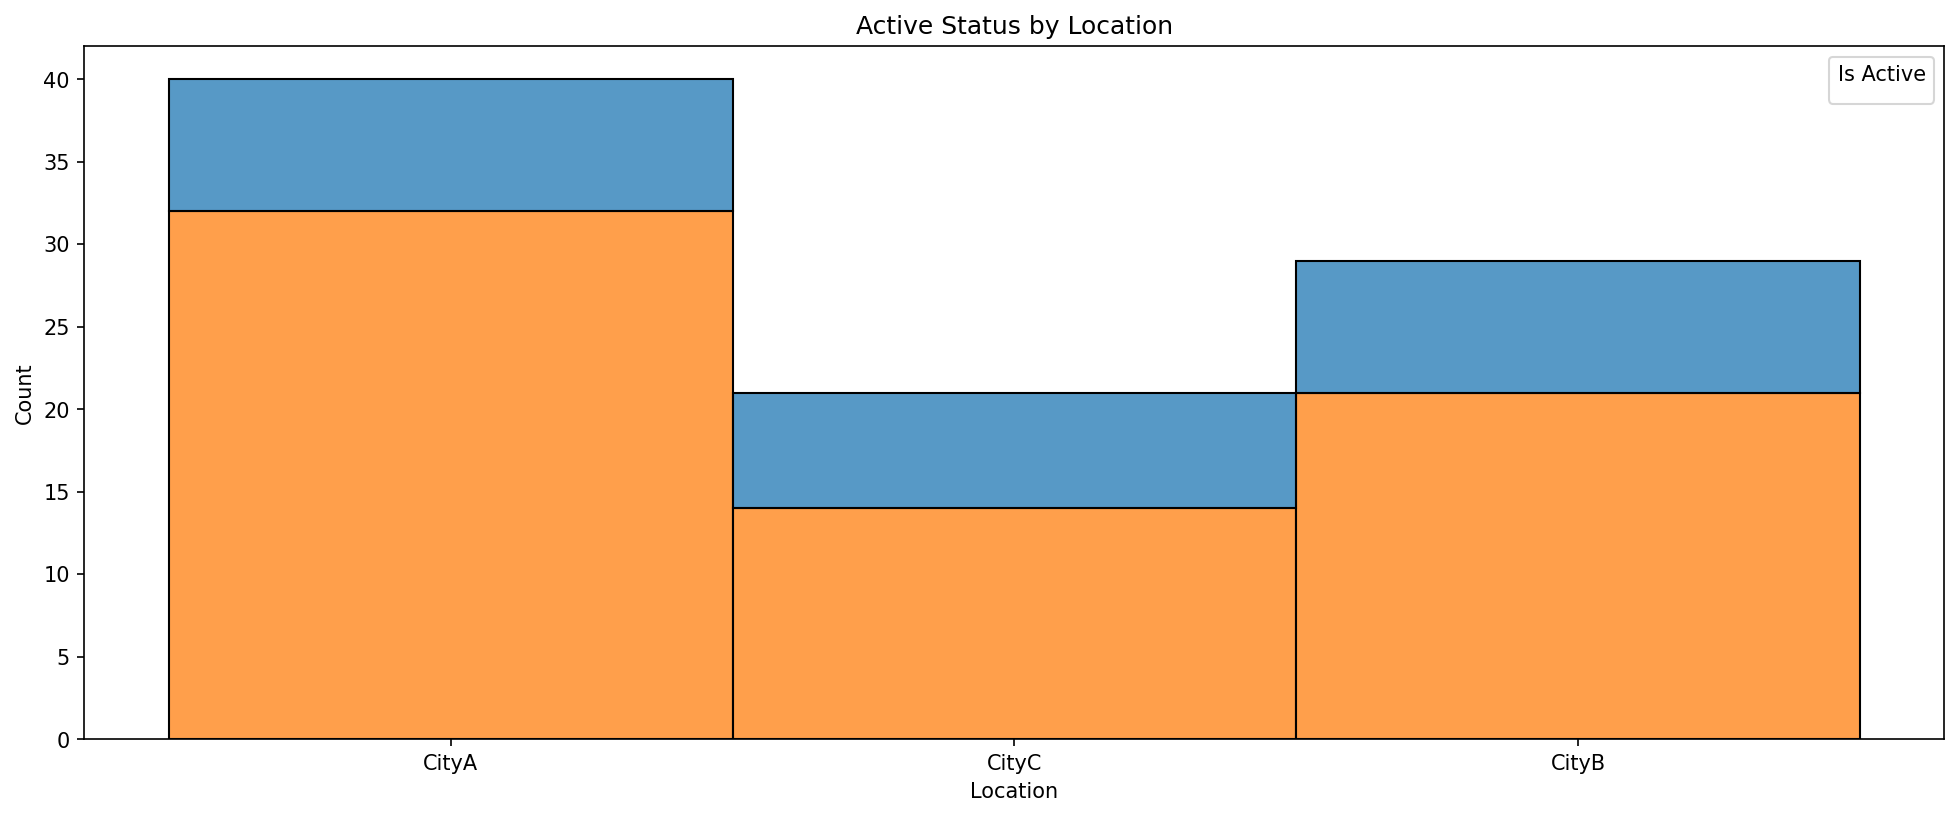

In [82]:
plt.figure(figsize=(16, 6), dpi=150)
sns.histplot(data=df, x='Location', hue='Is_Active', multiple='stack', )
plt.title('Active Status by Location')
plt.legend(title='Is Active')

plt.show()

Lesson 10: Time Series with Annotations
Task: Plot Account_Balance over time. Add vertical lines to mark dates where Purchase_Amount exceeds 250. Add a title and legend.
Hints: Use plt.vlines() with a condition.

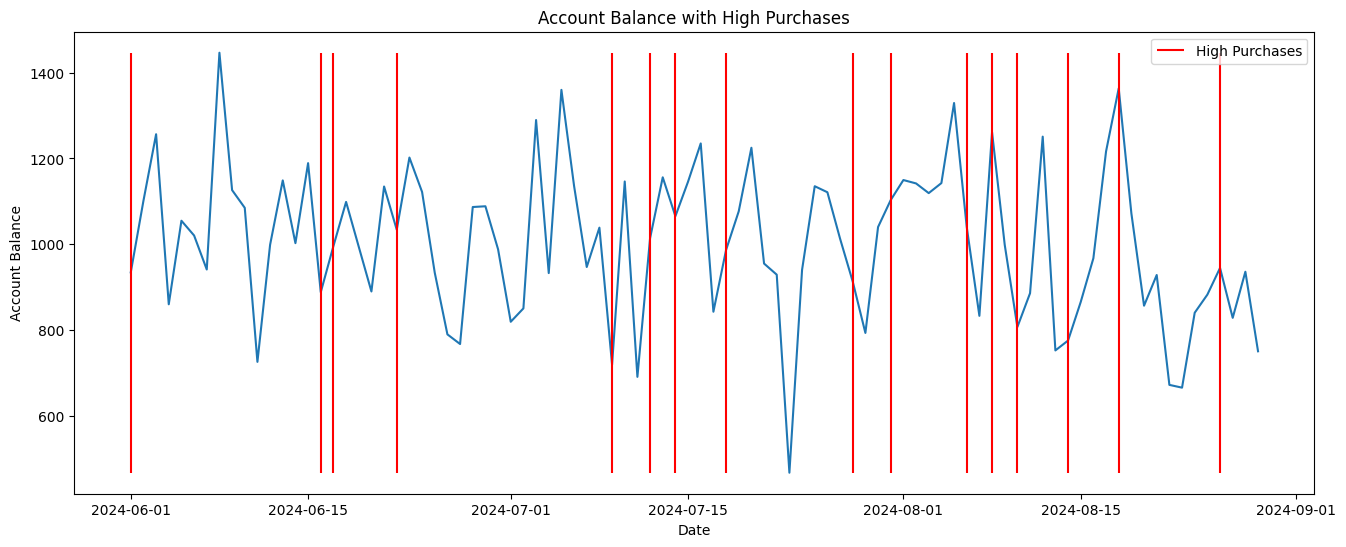

In [87]:
high_purchase_dates = df.index[df['Purchase_Amount'] > 250]

plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Account_Balance'])
plt.vlines(
    high_purchase_dates,
    ymin=df['Account_Balance'].min(),
    ymax=df['Account_Balance'].max(), 
    colors='red', 
    label='High Purchases'
)

plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.title('Account Balance with High Purchases')
plt.legend()
plt.show()

In [89]:
df['Account_Balance'].max()

np.float64(1446.317529185881)

In [91]:
df['Account_Balance'].min()

np.float64(467.85816939719984)